In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
from scipy.optimize import curve_fit
import importlib
from cycler import cycler
from matplotlib.ticker import MultipleLocator
from pathlib import Path
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\kearb\\Documents\\GitHub\\Python Projects\\AdvLabs\\Lab 3\\utils.py'>

# Cyclohexane

In [2]:
# ------------------------------------------------------------------
# 1 · load the background once
# ------------------------------------------------------------------
bkg = utils.load_scan("Data/cyclo_bg.txt")          # rows = Mass values

data_dict = {}

path = 'Data/Cyclo_data.txt'
df = utils.load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Cyclohexane'] = df.reset_index()   # back to columns if you prefer

# ------------------------------------------------------------------
# 3 · check one entry
# ------------------------------------------------------------------
print(data_dict["Cyclohexane"].head())


   Mass  Pressure (uncorrected)  Pressure (torr)
0   1.0            9.320000e-09     9.249300e-09
1   1.1            1.260000e-08     1.246900e-08
2   1.2            1.930000e-08     1.851300e-08
3   1.3            5.570000e-08     4.080000e-08
4   1.4            3.720000e-08     3.076000e-08


In [3]:
bkg = utils.load_scan("Data/eth_bg.txt")
path = 'Data/eth_1.txt'
df = utils.load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Ethanol'] = df.reset_index()   # back to columns if you prefer

In [4]:
for key, df in data_dict.items():
    df.drop(columns=['Pressure (uncorrected)'], inplace=True)
print(data_dict)


{'Cyclohexane':        Mass  Pressure (torr)
0       1.0     9.249300e-09
1       1.1     1.246900e-08
2       1.2     1.851300e-08
3       1.3     4.080000e-08
4       1.4     3.076000e-08
...     ...              ...
1486  149.6     8.607000e-11
1487  149.7     8.290000e-11
1488  149.8     2.887000e-11
1489  149.9     0.000000e+00
1490  150.0     1.927000e-11

[1491 rows x 2 columns], 'Ethanol':        Mass  Pressure (torr)
0       1.0     1.069100e-08
1       1.1     1.443600e-08
2       1.2     2.383500e-08
3       1.3     1.007000e-07
4       1.4     6.216000e-08
...     ...              ...
1486  149.6     4.240000e-11
1487  149.7     1.054000e-10
1488  149.8     9.830000e-11
1489  149.9     1.298000e-10
1490  150.0     7.070000e-11

[1491 rows x 2 columns]}


In [5]:
max_value = 0
for key, data in data_dict.items():
    temp_max = data['Pressure (torr)'].max()
    if temp_max > max_value:
        max_value = temp_max

In [6]:
for key, data in data_dict.items():
    intensity = data['Pressure (torr)'] / max_value * 100  # Normalize to percentage
    data_dict[key]['Intensity'] = intensity

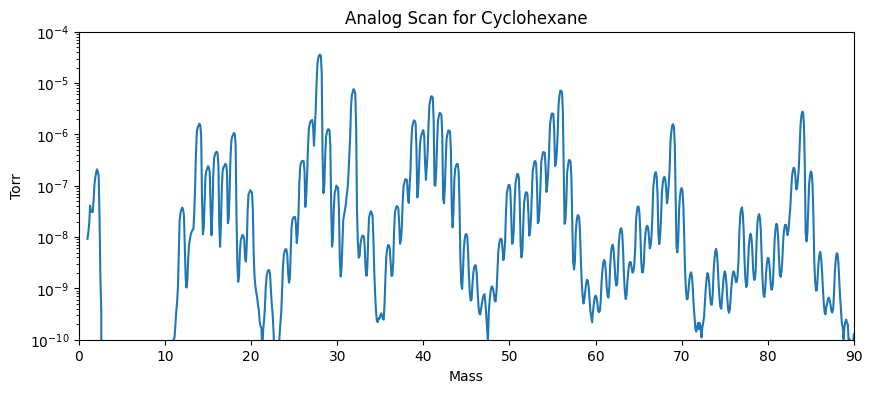

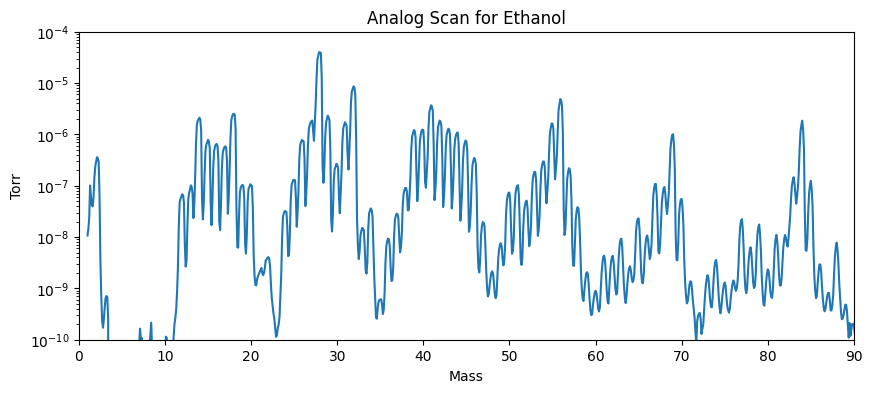

In [7]:
for key, data in data_dict.items():
    fig, ax = plt.subplots(figsize=(10, 4))
#     ax.axvline(x=2,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
#     ax.axvline(x=28,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
    ax.set_ylim(bottom=1e-10, top=1e-4)
    ax.set_xlim(0, 90)
    ax.set_yscale('log')
    ax.plot(data['Mass'], data['Pressure (torr)'])
    ax.set(xlabel='Mass', ylabel='Torr', title=f'Analog Scan for {key}')
    plt.show()
    

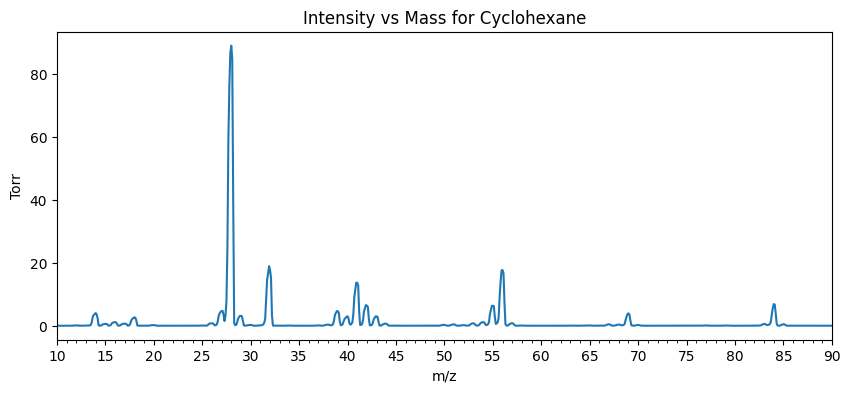

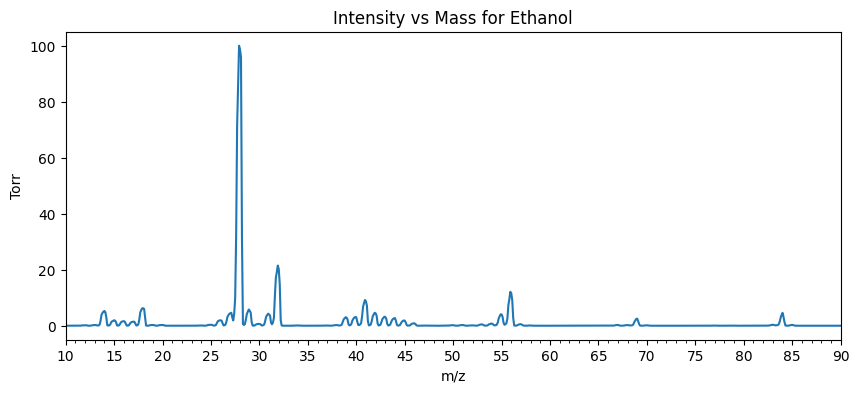

In [8]:
for key, data in data_dict.items():
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(data['Mass'], data['Intensity'])
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    #    ax.axvline(x=2,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    #    ax.axvline(x=28,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    #    ax.axvline(x=42,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    ax.set_xlim(10, 90)
    ax.set(xlabel='m/z', ylabel='Torr', title=f'Intensity vs Mass for {key}')
    plt.show()
    

In [9]:
peaks_ethanol, peaks_mass_ethanol = utils.find_peaks(data_dict['Ethanol'], cutoff=5, interval=1.5)
peaks_cyclohexane, peaks_mass_cyclohexane = utils.find_peaks(data_dict['Cyclohexane'], cutoff=5, interval=1.5)

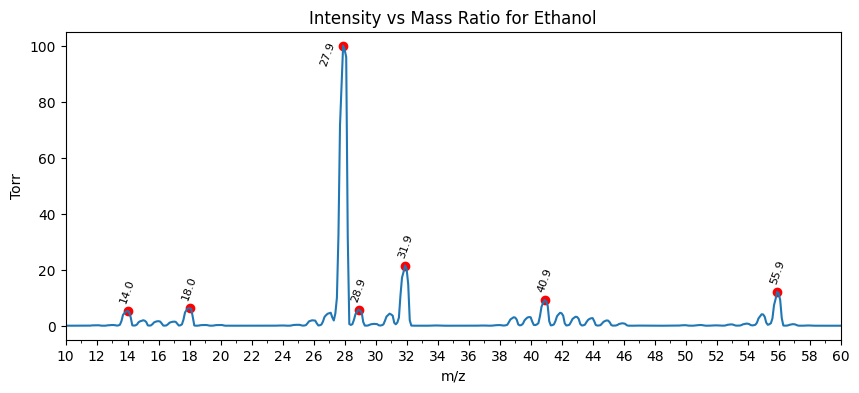

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data_dict['Ethanol']['Mass'], data_dict['Ethanol']['Intensity'])
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.scatter(peaks_mass_ethanol, peaks_ethanol, color='red')
for m, I in zip(peaks_mass_ethanol, peaks_ethanol):
    if I < 80:
        ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
                    xy=(m, I),           # point to annotate
                    xytext=(0, 5),       # (x-offset, y-offset) in points
                    textcoords='offset points',
                    ha='center',         # horizontal alignment
                    va='bottom',         # vertical alignment
                    fontsize=8,
                    rotation=70)         # slanted like your sample
    else:
            ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
                xy=(m-1, I-10),           # point to annotate
                xytext=(0, 5),       # (x-offset, y-offset) in points
                textcoords='offset points',
                ha='center',         # horizontal alignment
                va='bottom',         # vertical alignment
                fontsize=8,
                rotation=70)         # slanted like your sample
#    ax.axvline(x=2,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=28,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=42,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
ax.set_xlim(10, 60)
ax.set(xlabel='m/z', ylabel='Torr', title=f'Intensity vs Mass Ratio for Ethanol')
plt.show()

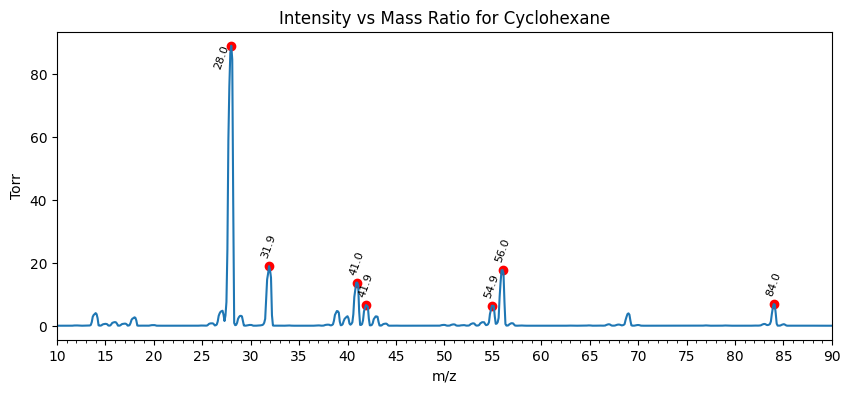

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data_dict['Cyclohexane']['Mass'], data_dict['Cyclohexane']['Intensity'])
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.scatter(peaks_mass_cyclohexane, peaks_cyclohexane, color='red')
for m, I in zip(peaks_mass_cyclohexane, peaks_cyclohexane):
    if I < 80:
        ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
                    xy=(m, I),           # point to annotate
                    xytext=(0, 5),       # (x-offset, y-offset) in points
                    textcoords='offset points',
                    ha='center',         # horizontal alignment
                    va='bottom',         # vertical alignment
                    fontsize=8,
                    rotation=70)         # slanted like your sample
    else:
            ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
                xy=(m-1, I-10),           # point to annotate
                xytext=(0, 5),       # (x-offset, y-offset) in points
                textcoords='offset points',
                ha='center',         # horizontal alignment
                va='bottom',         # vertical alignment
                fontsize=8,
                rotation=70)         # slanted like your sample
#    ax.axvline(x=2,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=28,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=42,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
ax.set_xlim(10, 90)
ax.set(xlabel='m/z', ylabel='Torr', title=f'Intensity vs Mass Ratio for Cyclohexane')
plt.show()

In [15]:
ethanol_peaks_df = pd.DataFrame({
    'Mass': peaks_mass_ethanol,
    'Intensity': peaks_ethanol
})
cyclo_peaks_df = pd.DataFrame({
    'Mass': peaks_mass_cyclohexane,
    'Intensity': peaks_cyclohexane
})

In [18]:
print(f'Peaks for ethanol: \n',ethanol_peaks_df)

Peaks for ethanol: 
    Mass   Intensity
0  14.0    5.266846
1  18.0    6.252182
2  27.9  100.000000
3  28.9    5.785575
4  31.9   21.489850
5  40.9    9.187491
6  55.9   12.106838


In [19]:
print(f'Peaks for Cyclohexane: \n',cyclo_peaks_df)

Peaks for Cyclohexane: 
    Mass  Intensity
0  28.0  89.064292
1  31.9  18.955309
2  41.0  13.702180
3  41.9   6.570028
4  54.9   6.348421
5  56.0  17.717343
6  84.0   6.896778
